In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('used_cars_UK.csv')

In [3]:
df.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [4]:
df.shape

(3685, 14)

In [5]:
# There are total 3685 rows and 14 variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,2314.770963,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,1415.821308,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,0.000000,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,1059.000000,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,2279.000000,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,3593.000000,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,4727.000000,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


In [8]:
df.isnull().sum()

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

In [9]:
# There are null values

In [10]:
df['Previous Owners'].fillna(df['Previous Owners'].mean(),inplace=True)


In [11]:
df['Doors'].fillna(df['Doors'].mean(),inplace=True)

In [12]:
df['Seats'].fillna(df['Seats'].mean(),inplace=True)

In [14]:
df.isnull().sum()

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners         0
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                   0
Seats                   0
Emission Class         87
Service history      3145
dtype: int64

In [15]:
# Removing unwanted features
df=df.drop(['Unnamed: 0','Service history','title','Registration_Year'],axis=1)

In [17]:
df.dropna(subset=['Emission Class'],inplace=True)

In [18]:
# Remove 'L' using regex
df['Engine'] = df['Engine'].str.replace('L','',regex=True).astype(float)

df['Engine'].fillna(0,inplace=True)

In [19]:
# Remove 'Euro' prefix using regex

df['Emission Class'] = df['Emission Class'].str.replace('Euro','',regex=True).astype(int)

In [20]:
# Label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder


In [22]:
label_encoder = LabelEncoder()

In [23]:
cat_cols = ['Fuel type','Body type','Gearbox']

for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])

In [24]:
df.head()

,Price,Mileage(miles),Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class
0,6900,70189,3.000000,0,4,1.4,1,5.0,5.0,6
1,1495,88585,4.000000,2,4,1.2,1,3.0,5.0,4
2,949,137000,2.807557,2,4,1.4,1,5.0,5.0,5
3,2395,96731,5.000000,2,4,1.4,1,3.0,4.0,4
4,1000,85000,2.807557,0,4,1.3,1,5.0,5.0,5


In [25]:
# Splitting

x=df.drop('Price',axis=1)
y=df['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [29]:
# Model building

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)

In [36]:
# Evaluation

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
mae = mean_absolute_error(y_test,y_pred)

In [38]:
mse=mean_squared_error(y_test,y_pred)

In [39]:
rmse=np.sqrt(mse)

In [40]:
r2=r2_score(y_test,y_pred)

In [42]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1995.04


In [43]:
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 7286093.16


In [44]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 2699.28


In [45]:
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 0.64


Text(0.5, 1.0, 'Model Performance - Actual vs. Predicted Values')

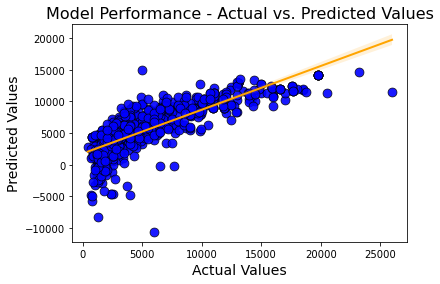

In [48]:
# Scatter plot
sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

# Add a regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "orange", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)